<a href="https://colab.research.google.com/github/FurqanBhat/ML-Colab-Notebooks/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [37]:
transform=transforms.ToTensor()
mnist_data=datasets.MNIST(root='./data', train=True, download=True, transform=transform)

dataloader=torch.utils.data.DataLoader(dataset=mnist_data,batch_size=64,shuffle=True)

In [38]:
dataiter=iter(dataloader)
images, labels=next(dataiter)
print(images.shape)
print(torch.min(images), torch.max(images))

torch.Size([64, 1, 28, 28])
tensor(0.) tensor(1.)


In [42]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    #N, 784
    self.encoder=nn.Sequential(
        nn.Linear(784, 128),  #Nx784 -> Nx3
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64,12),
        nn.ReLU(),
        nn.Linear(12,3)

    )

    self.decoder=nn.Sequential(
        nn.Linear(3,12),  #Nx3 -> Nx128
        nn.ReLU(),
        nn.Linear(12, 64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128, 784),
        nn.Sigmoid()  #Used this because because our values are between 0 & 1 #as can be seen above. If values were between -1 & 1, we could have #used nn.Tanh

    )



  def forward(self, x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

In [43]:
model=AutoEncoder()
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [46]:
num_epochs=10
outputs=[]
for epoch in range(num_epochs):
  for images, labels in dataloader:
    images=images.reshape(-1,784)
    output=model(images)


    loss=criterion(output, images)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


  print(f"EPoch {epoch+1}/{num_epochs}, loss={loss.item():.4f}")
  outputs.append((epoch, images,output))



EPoch 1/10, loss=0.0449
EPoch 2/10, loss=0.0430
EPoch 3/10, loss=0.0439
EPoch 4/10, loss=0.0329
EPoch 5/10, loss=0.0372
EPoch 6/10, loss=0.0419
EPoch 7/10, loss=0.0340
EPoch 8/10, loss=0.0363
EPoch 9/10, loss=0.0307
EPoch 10/10, loss=0.0388


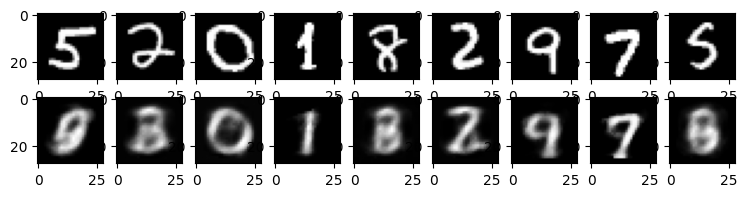

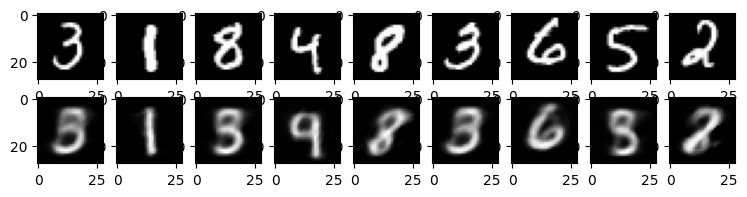

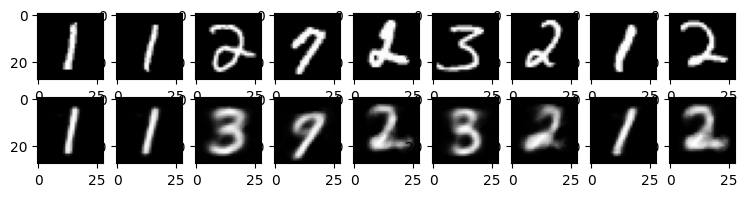

In [59]:
for k in range(0, num_epochs, 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs=outputs[k][1].detach().numpy()
  recon=outputs[k][2].detach().numpy()

  for i, item in enumerate(imgs):
    if i>=9: break
    plt.subplot(2,9,i+1)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    item=item.reshape(-1,28,28)
    plt.imshow(item[0])